# bitonic_sort算法
Bitonic Sort（双调排序）是一种并行排序算法，可以使用并行硬件来加速排序过程。其步骤如下：

将输入数组分成两个部分，每个部分包含n/2个元素，并按升序排序。

将这两个部分中的每一个子序列再次分成两个部分，每个部分包含n/4个元素，并根据它们在各自的部分中的位置比较大小，选择升序或降序排列。

重复步骤2，将每个子序列分成更小的子序列并按位比较大小，直到仅剩单个元素为止。

整个过程可以通过递归实现。Bitonic Sort 可以被看作是一种分治算法，它可以有效地利用同步硬件进行并行计算，因此在一些并行架构上被广泛应用。


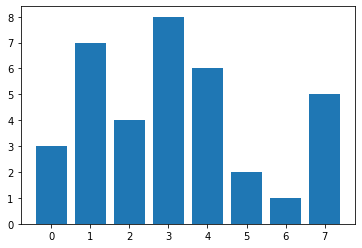

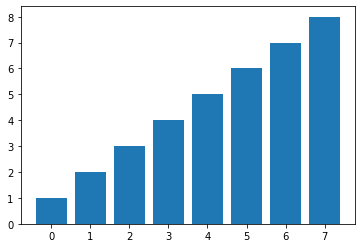

In [7]:
import random
import matplotlib.pyplot as plt

def exchange(arr, i, j):
    temp = arr[i]
    arr[i] = arr[j]
    arr[j] = temp

def compare_and_swap(arr, i, j, order):
    if (order == (arr[i] > arr[j])):
        exchange(arr, i, j)

def bitonic_merge(arr, start, end, order):
    if end - start <= 1:
        return

    mid = (start + end) // 2
    
    # 将左半部分升序排列，右半部分降序排列
    for i in range(start, mid):
        compare_and_swap(arr, i, i + mid - start, order)

    # 递归地进行双调合并
    bitonic_merge(arr, start, mid, order)
    bitonic_merge(arr, mid, end, order)

def bitonic_sort(arr, start, end, order):
    if end - start <= 1:
        return

    mid = (start + end) // 2
    
    # 将左半部分降序排列，右半部分升序排列
    bitonic_sort(arr, start, mid, not order)
    bitonic_sort(arr, mid, end, order)

    # 合并两个有序序列
    bitonic_merge(arr, start, end, order)




# 可视化用例
arr = [3, 7, 4, 8, 6, 2, 1, 5]
n = len(arr)

# 排序前的可视化
plt.bar(range(len(arr)), arr)
plt.show()

# 排序后的可视化
bitonic_sort(arr, 0, n, True) # 升序排序
plt.bar(range(len(arr)), arr)
plt.show()